In [122]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.style.use('seaborn')

In [123]:
def get_data_and_processing():
    x_train=pd.read_csv('Diabetes_XTrain.csv').values
    y_train=pd.read_csv('Diabetes_YTrain.csv').values
    x_test=pd.read_csv('Diabetes_Xtest.csv')
    training_data=pd.read_csv('Diabetes_XTrain.csv')
    training_data['Outcome']=pd.DataFrame(y_train)
    return x_train,y_train,x_test.values,training_data,x_test

In [124]:
def plot_bar_graph(data_frame):
    # no. of x-features = 9,No. of classes = 2 
    # for first plot -- x axis -> features    y-axis-->classes no.
    plt.title("     PARALLEL COORDINATES PLOT :")
    label = data_frame.columns[-1]
    parallel_coordinates(data_frame,class_column=label,color=('#FFE888','#4ECDC4'))
    plt.show()
    print("  BAR CHART SHOWING DATA DISTRIBUTION IN CLASS 0 AND 1")
    data_frame.groupby('Outcome').hist(figsize=(9,9),color='pink')
    plt.show()


In [125]:
def euclidian_distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [132]:
def KNN_Model(x,y,xtest_val,k=5):
    distances=[]
    for i in range(x.shape[0]):
        distances.append((euclidian_distance(x[i],xtest_val),y[i]))
    #print(distances)
    distances=sorted(distances)
    distances=distances[:k]
    distances=np.array(distances)
    frequency_count=np.unique(distances[:,1],return_counts=True)
    index=int(frequency_count[1].argmax())
    y_pred=frequency_count[0][index]
    return int(y_pred)

In [143]:
def main():
    x_train,y_train,x_test,training_data,testing_data=get_data_and_processing()
    plot_bar_graph(training_data)
    y_pred_list=[]
    for i in range(x_test.shape[0]):
        y_pred=KNN_Model(x_train,y_train,x_test[i],k=5)
        y_pred_list.append(y_pred)
    testing_data['Outcome']=y_pred_list
    print("          PLOTS OF PREDICTED DATA:")
    plot_bar_graph(testing_data)
    testing_data.to_csv('testing_data_with_predicted_y_values.csv')
    return testing_data 

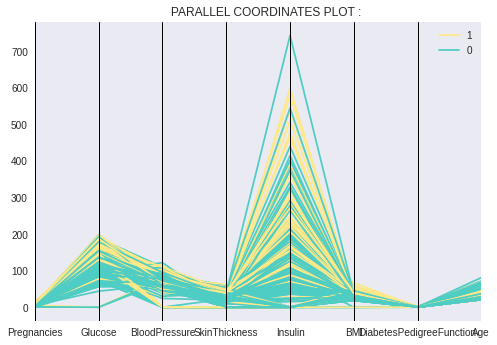

  BAR CHART SHOWING DATA DISTRIBUTION IN CLASS 0 AND 1


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning

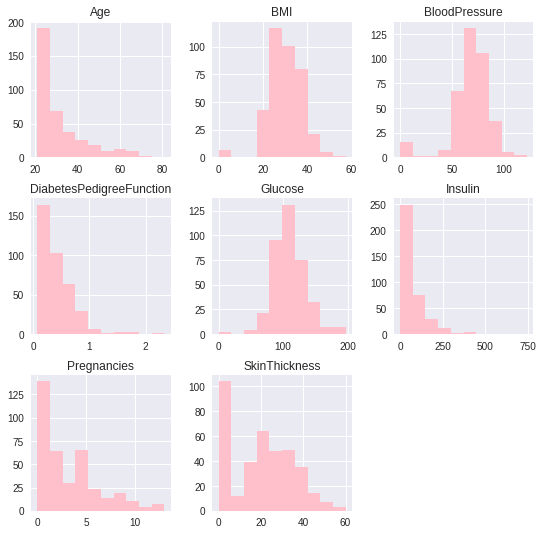

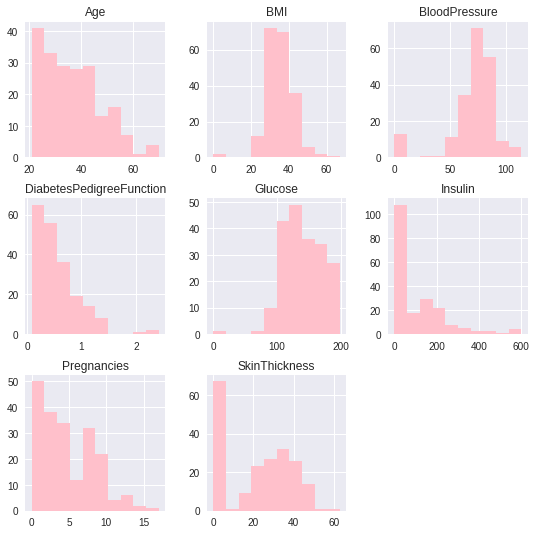

          PLOTS OF PREDICTED DATA:


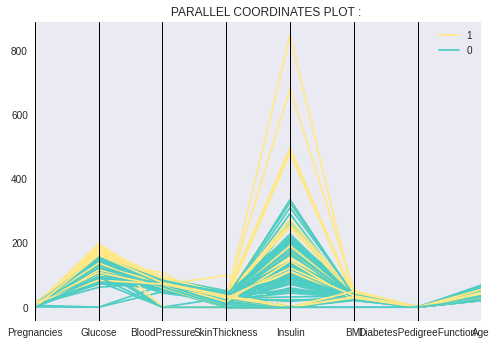

  BAR CHART SHOWING DATA DISTRIBUTION IN CLASS 0 AND 1


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning

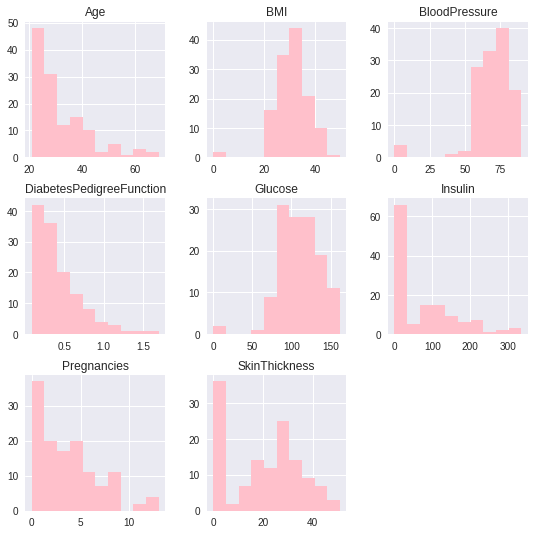

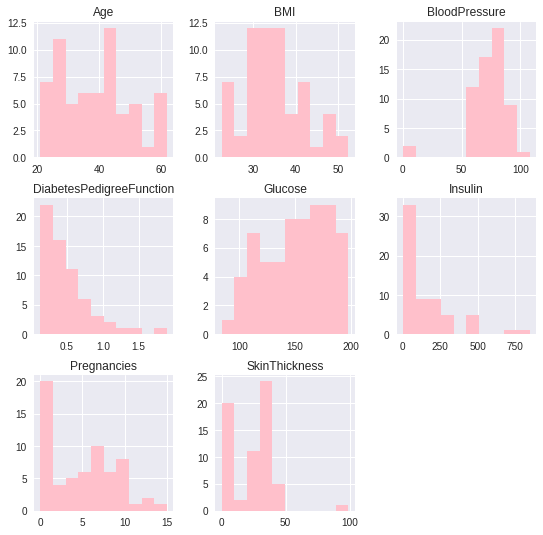

In [145]:
if __name__=='__main__':
    Predicted_data=main()

In [146]:
Predicted_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,1
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,1
188,3,130,64,0,0,23.1,0.314,22,0
189,0,162,76,36,0,49.6,0.364,26,1
190,12,84,72,31,0,29.7,0.297,46,1
